# Amazon Sales Data Analysis


This notebook demonstrates how to analyze Amazon sales data. We will perform the following tasks:
1. Data Cleaning and Preprocessing
2. Identify the highest sales regions
3. Perform exploratory analysis to gain insights into the dataset
4. Visualize trends and relationships


In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'Amazon Sales data.csv'  
sales_data = pd.read_csv(file_path)

sales_data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### Step 1: Data Cleaning and Preprocessing

In [4]:
# Check for missing values
missing_values = sales_data.isnull().sum()

# Display data types
data_types = sales_data.dtypes

missing_values, data_types


(Region            0
 Country           0
 Item Type         0
 Sales Channel     0
 Order Priority    0
 Order Date        0
 Order ID          0
 Ship Date         0
 Units Sold        0
 Unit Price        0
 Unit Cost         0
 Total Revenue     0
 Total Cost        0
 Total Profit      0
 dtype: int64,
 Region             object
 Country            object
 Item Type          object
 Sales Channel      object
 Order Priority     object
 Order Date         object
 Order ID            int64
 Ship Date          object
 Units Sold          int64
 Unit Price        float64
 Unit Cost         float64
 Total Revenue     float64
 Total Cost        float64
 Total Profit      float64
 dtype: object)

### Step 2: Identify the Highest Sales Regions

Total Sales by Region:
Region
Sub-Saharan Africa                   39672031.43
Europe                               33368932.11
Asia                                 21347091.02
Australia and Oceania                14094265.13
Middle East and North Africa         14052706.58
Central America and the Caribbean     9170385.49
North America                         5643356.55
Name: Total Revenue, dtype: float64


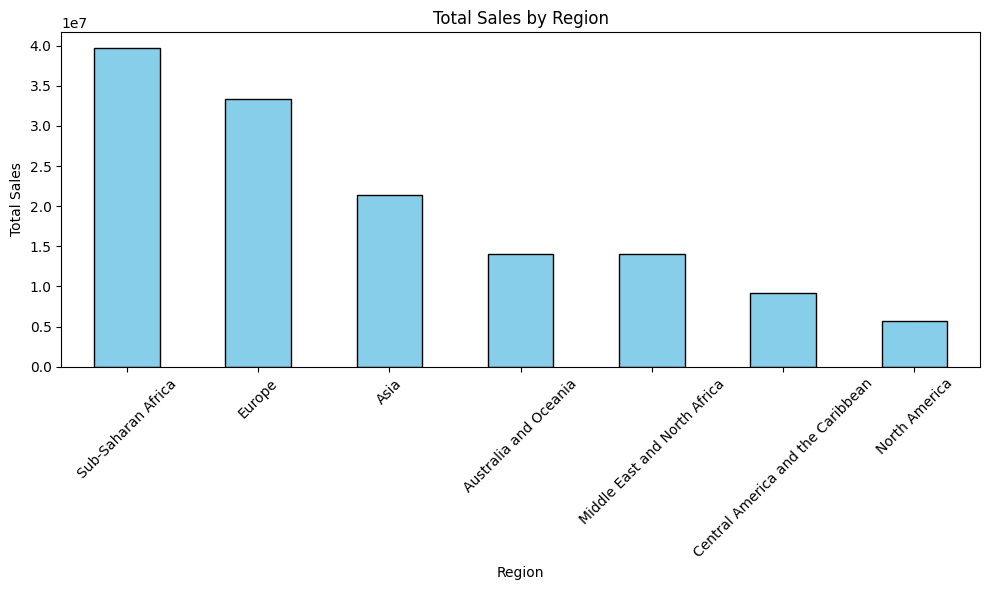

In [9]:


region_sales = sales_data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)


print("Total Sales by Region:")
print(region_sales)


plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 3: Exploratory Data Analysis (EDA)

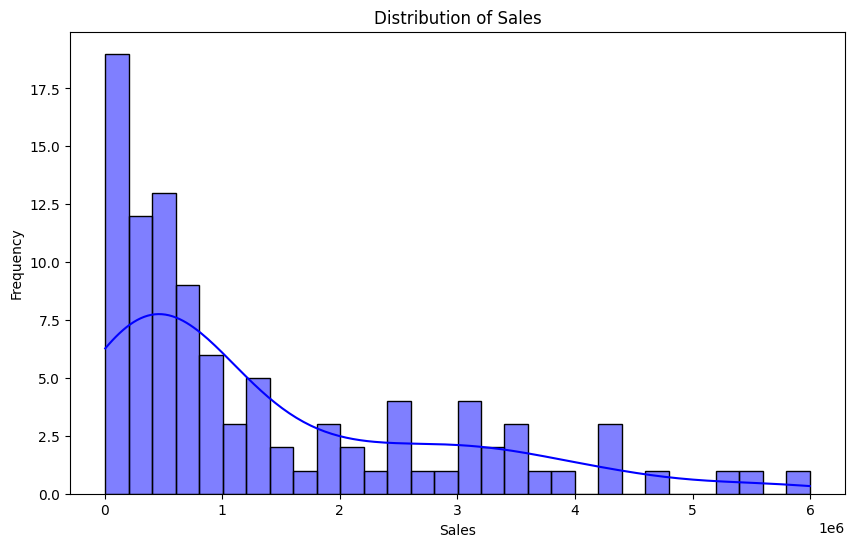

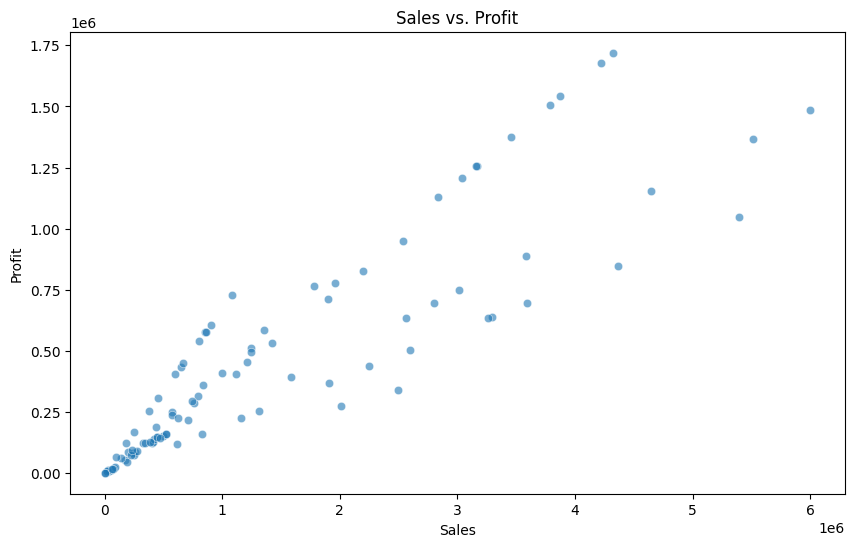

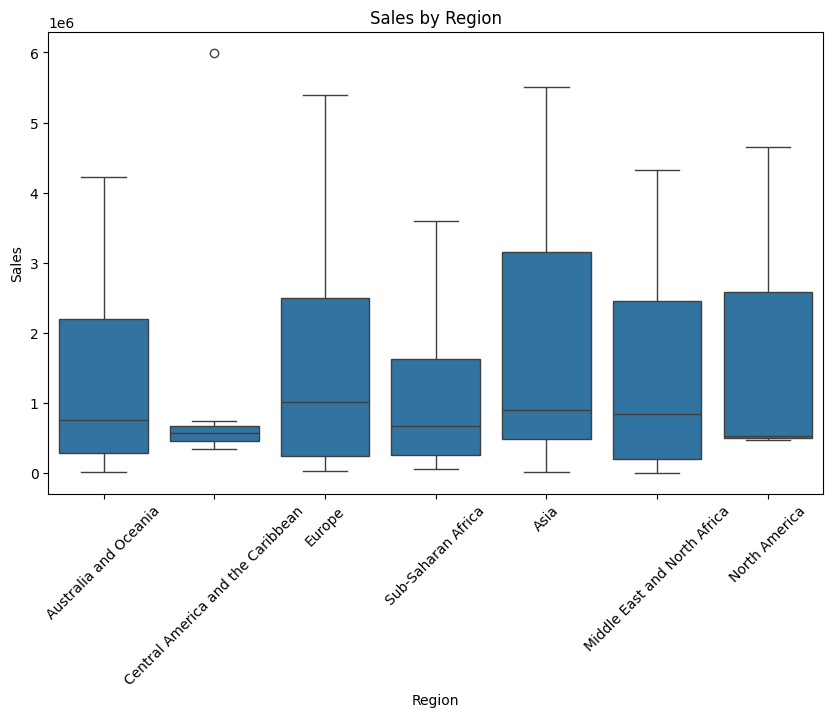

In [10]:


plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Total Revenue'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Revenue', y='Total Profit', data=sales_data, alpha=0.6)
plt.title('Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Total Revenue', data=sales_data)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


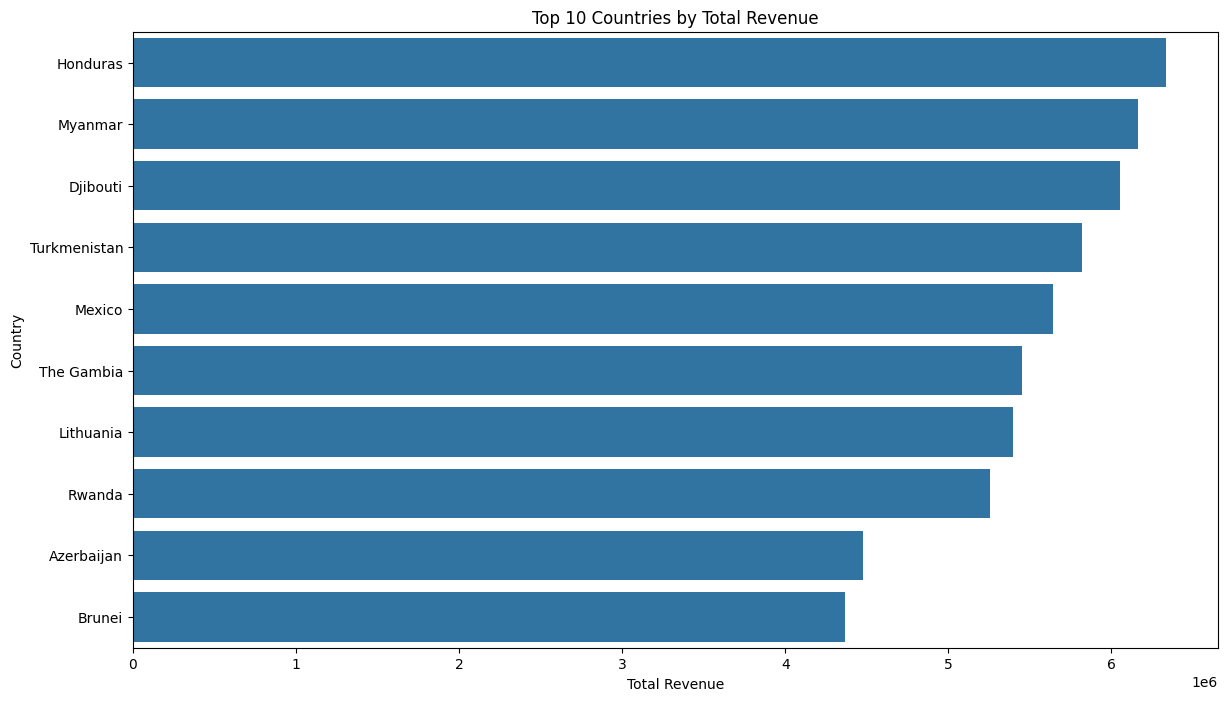

In [14]:
country_sales = sales_data.groupby('Country')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False)

# Plotting Top 10 Countries by Total Revenue
plt.figure(figsize=(14, 8))
sns.barplot(data=country_sales.head(10), x='Total Revenue', y='Country')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

### Step 4: Insights and Trends

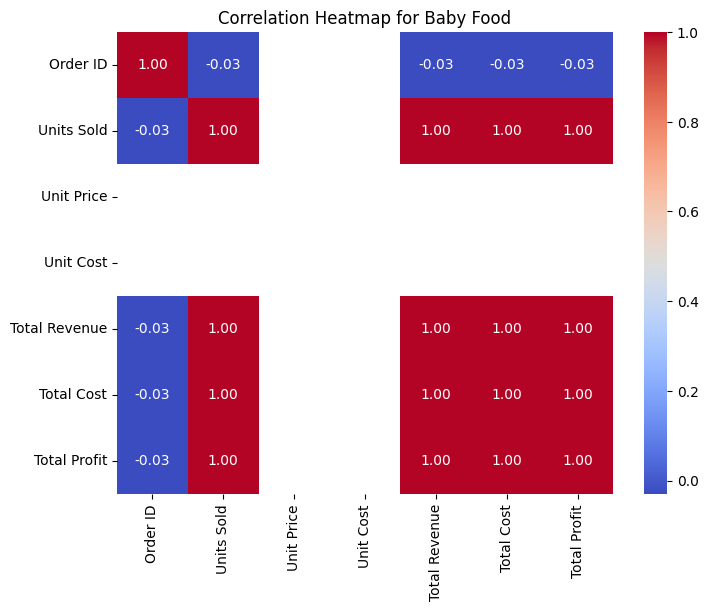

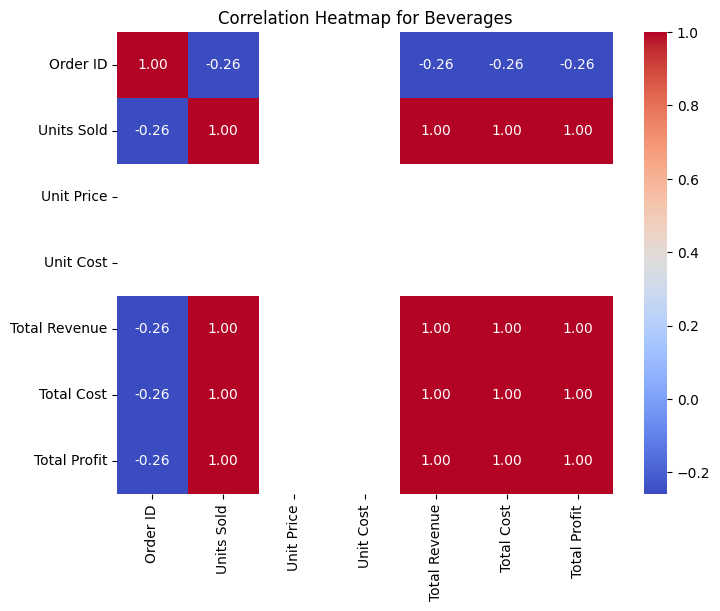

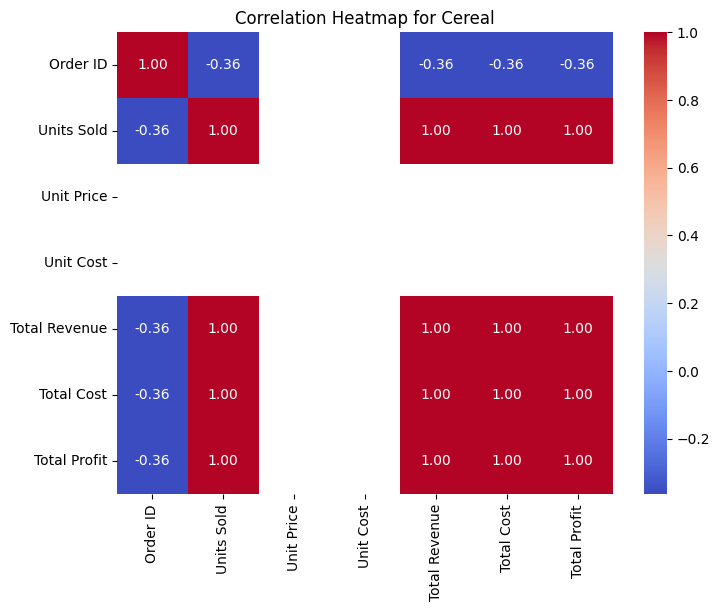

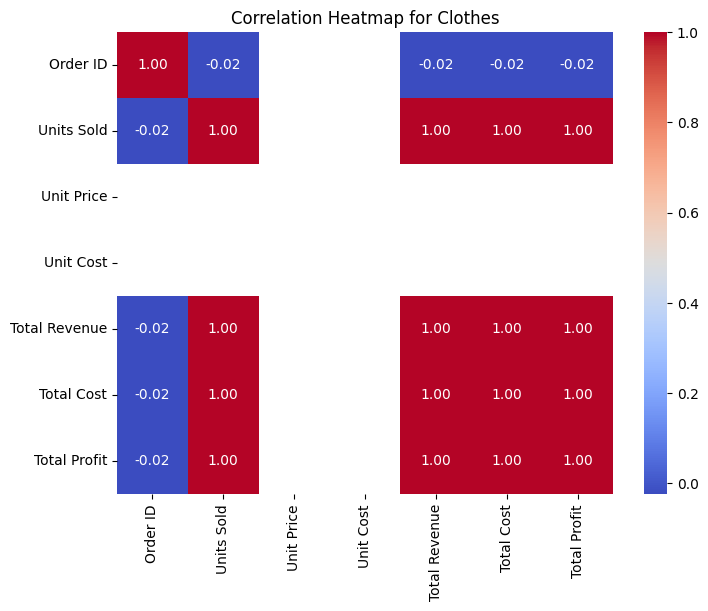

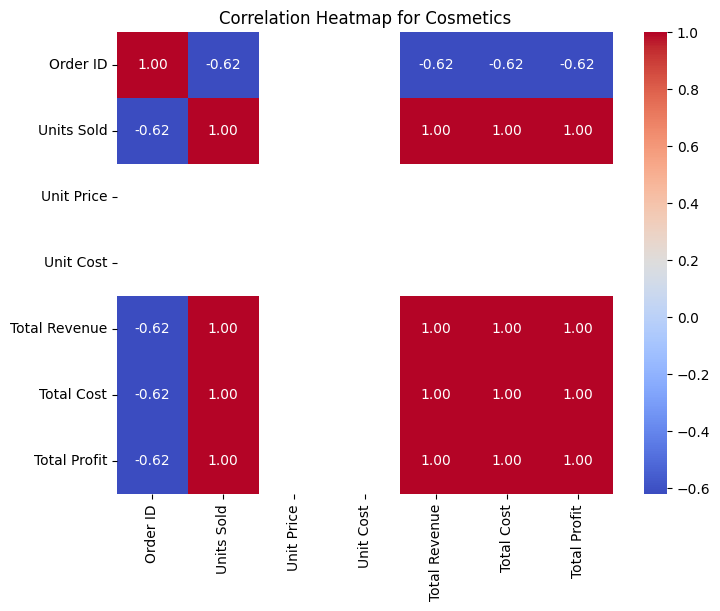

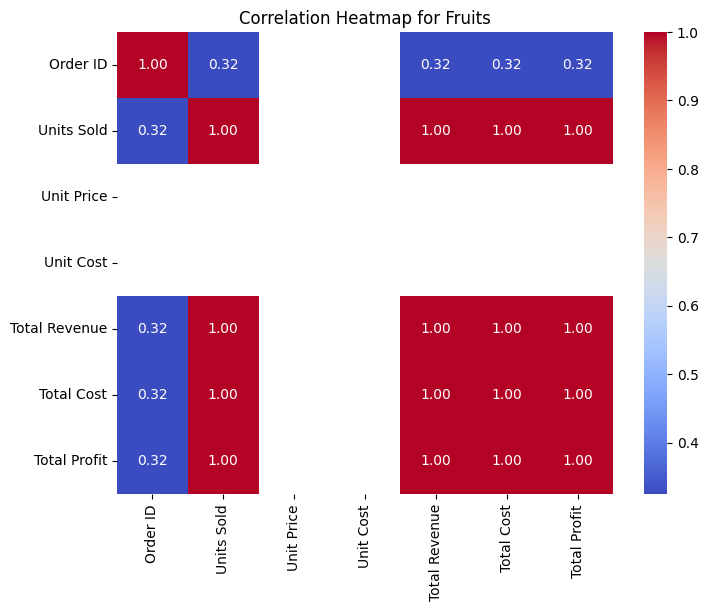

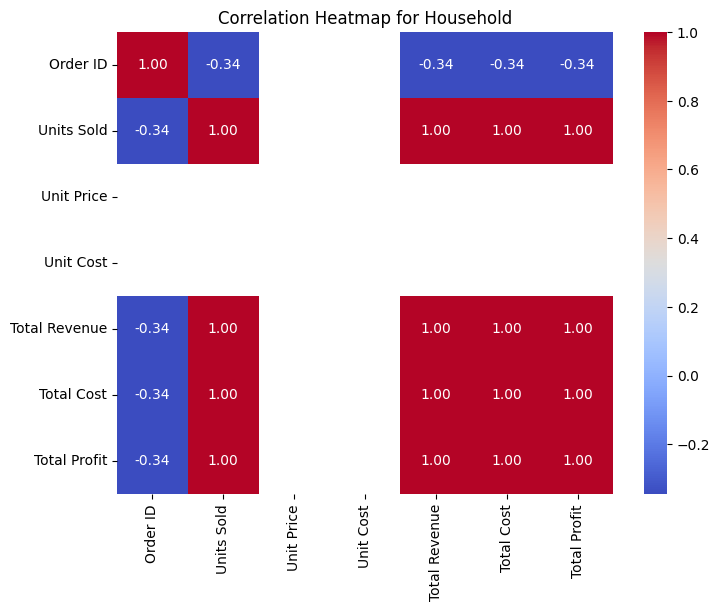

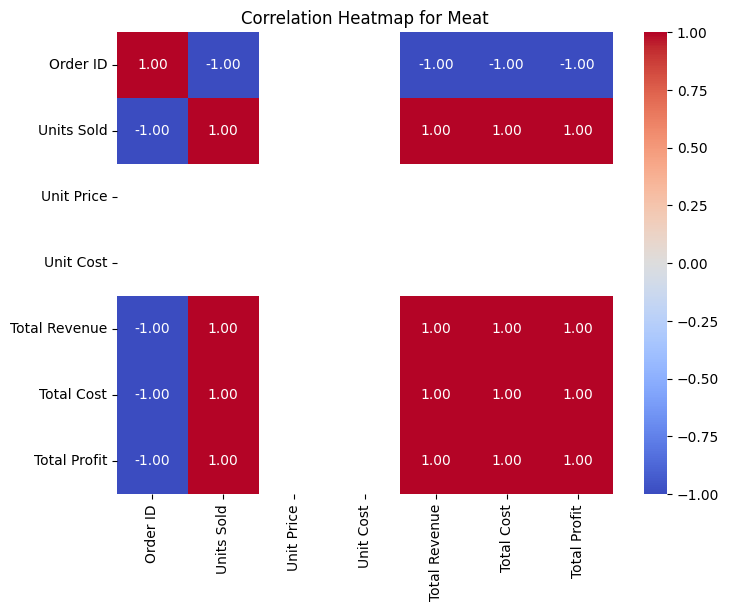

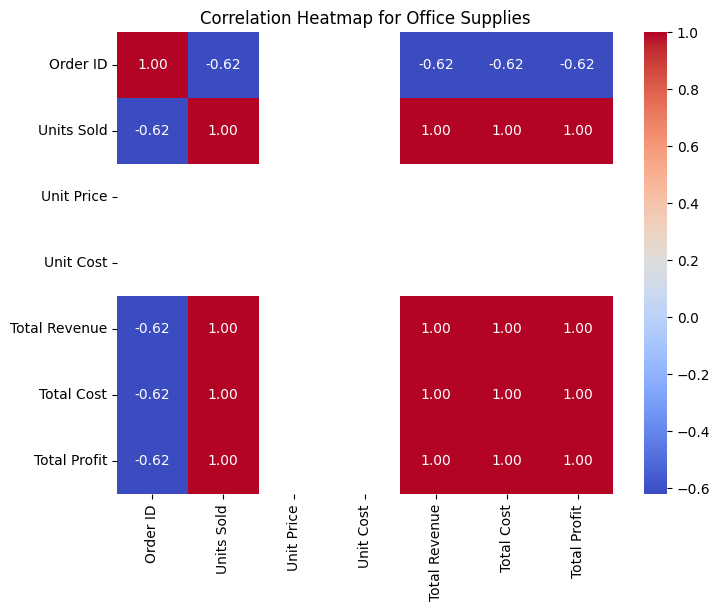

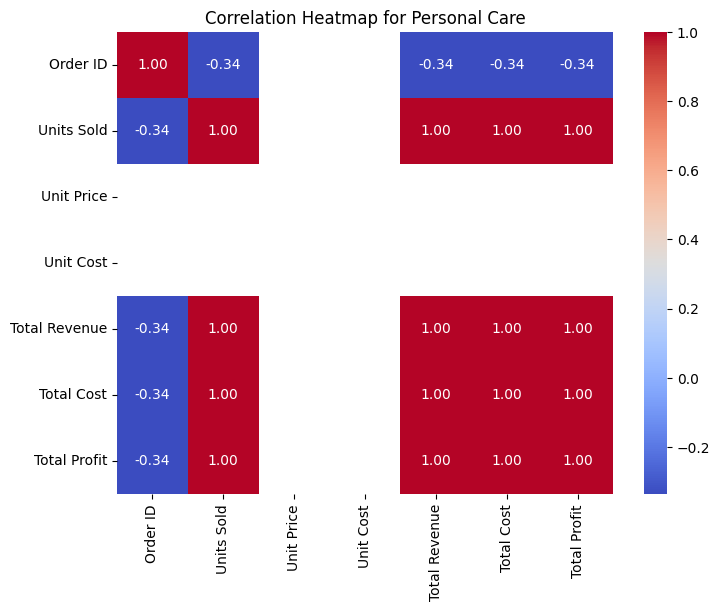

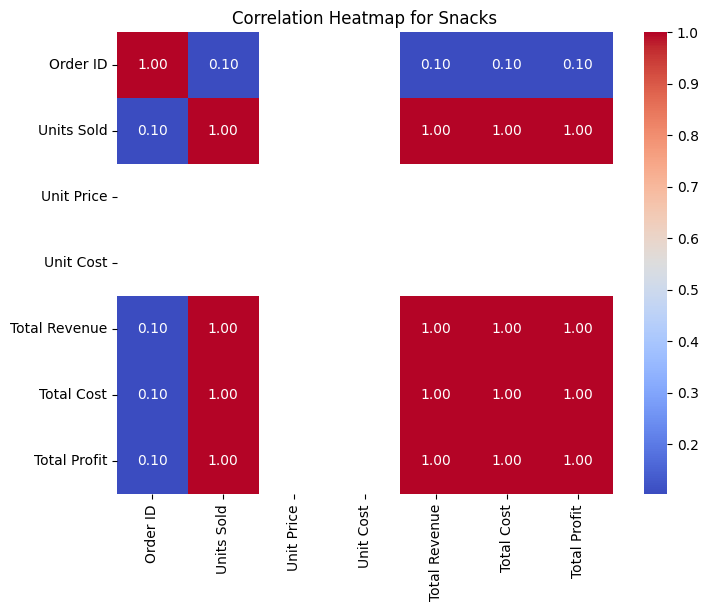

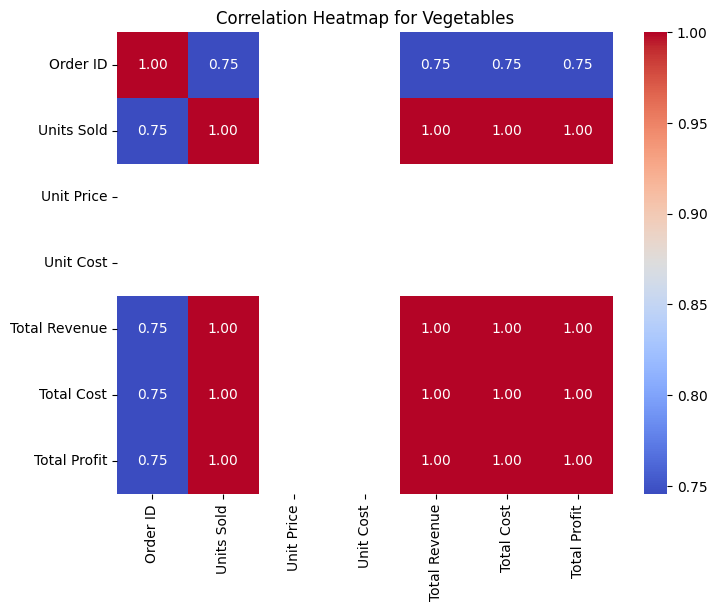

In [13]:
item_groups = sales_data.groupby('Item Type')


for item_type, group in item_groups:
   
    numeric_data = group.select_dtypes(include=['float64', 'int64'])
    
    
    if numeric_data.shape[1] < 2:
        print(f"Skipping {item_type} - not enough numeric data.")
        continue
    

    corr_matrix = numeric_data.corr()
    
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap for {item_type}')
    plt.show()